# Sharp Ratio & Frontier

In [8]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
#start = datetime.datetime.now().replace(year=last_year)
start = date(date.today().year, 1, 1)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [17]:
tickers = ['USIM5.SA', 'TIET4.SA', 'ENBR3.SA', 'ITUB4.SA', 'ABCB4.SA',
           'LEVE3.SA', 'ABEV3.SA', 'FLRY3.SA', 'ODPV3.SA', 'PSSA3.SA',
           'WHRL3.SA', 'WEGE3.SA', 'ROMI3.SA']

usim = web.DataReader(tickers[0], ds_yahoo, start, end)
tiet = web.DataReader(tickers[1], ds_yahoo, start, end)
enbr = web.DataReader(tickers[2], ds_yahoo, start, end)
itau = web.DataReader(tickers[3], ds_yahoo, start, end)
abcb = web.DataReader(tickers[4], ds_yahoo, start, end)
leve = web.DataReader(tickers[5], ds_yahoo, start, end)
abev = web.DataReader(tickers[6], ds_yahoo, start, end)
flry = web.DataReader(tickers[7], ds_yahoo, start, end)
odpv = web.DataReader(tickers[8], ds_yahoo, start, end)
pssa = web.DataReader(tickers[9], ds_yahoo, start, end)
whrl = web.DataReader(tickers[10], ds_yahoo, start, end)
wege = web.DataReader(tickers[11], ds_yahoo, start, end)
romi = web.DataReader(tickers[12], ds_yahoo, start, end)

arr = [usim, tiet, enbr, itau, abcb, leve, abev, flry, odpv, pssa, whrl, wege, romi]

## Normalizando o retorno diário de cada ativo do portfólio

In [18]:
for acao_df in (arr):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [19]:
pesos = [5.82, 13.35, 4.58, 14.12, 2.16, 8.56, 6.60, 11.36, 1.86, 18.43, 9.97, 2.87, 0.31]

for acao_df, alocacao in zip((arr), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [20]:
for acao_df in arr:
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [24]:
todas_posicoes = [usim['Posicao'], tiet['Posicao'], enbr['Posicao'], abcb['Posicao'], itau['Posicao'],
                  leve['Posicao'], abev['Posicao'], flry['Posicao'], odpv['Posicao'], 
                  pssa['Posicao'], whrl['Posicao'], wege['Posicao'], romi['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [30]:
portfolio_posicao.columns = tickers
portfolio_acoes.columns = tickers

## Desempenho da carteira

In [31]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [32]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
999900.0
Investimento final:
698639.61


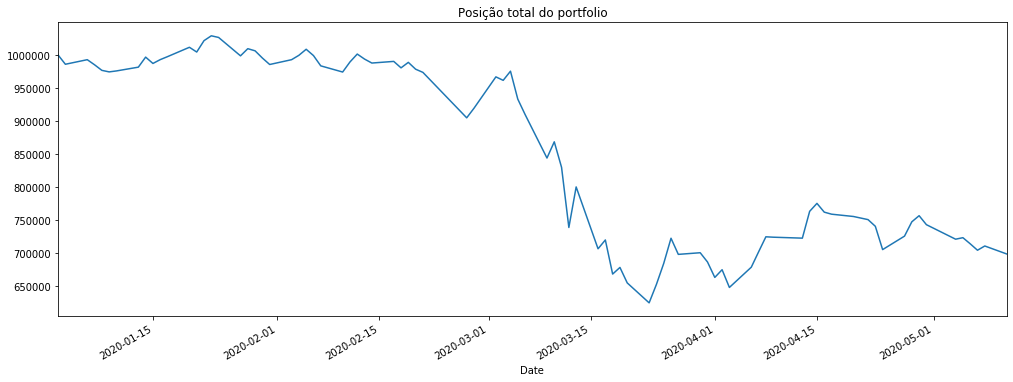

In [33]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

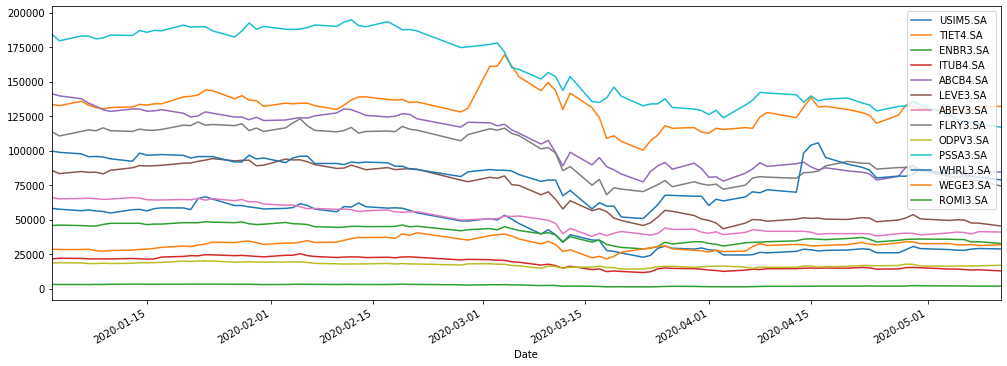

In [34]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

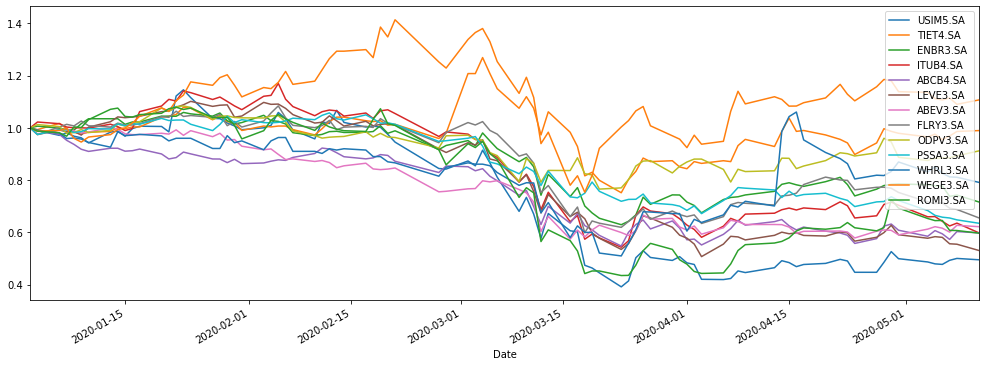

In [35]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

In [36]:
desempenho = (portfolio_acoes.iloc[-1] - portfolio_acoes.iloc[0]) / portfolio_acoes.iloc[0]
desempenho = round(desempenho * 100, 2)
desempenho.sort_values()

USIM5.SA   -50.47
LEVE3.SA   -46.90
ROMI3.SA   -40.28
ABCB4.SA   -40.17
ITUB4.SA   -40.15
ABEV3.SA   -37.81
PSSA3.SA   -36.49
FLRY3.SA   -34.43
ENBR3.SA   -28.36
WHRL3.SA   -20.85
ODPV3.SA    -8.83
TIET4.SA    -1.05
WEGE3.SA    10.66
dtype: float64

## Retorno diário da carteira

In [37]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [38]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média -0.36% diariamente


In [39]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.03249542752313296

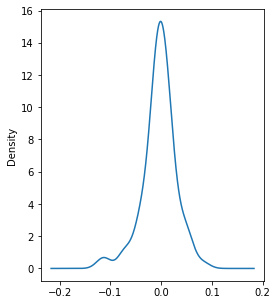

In [40]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [41]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {} %'.format(round_ret))

Essa carteira rendeu -30.129 %


In [42]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

-0.11160629204785898

In [43]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

-1.7469147901499482

## Retorno diário

In [44]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [45]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['USIM5.SA', 'TIET4.SA', 'ENBR3.SA', 'ITUB4.SA', 'ABCB4.SA', 'LEVE3.SA',
       'ABEV3.SA', 'FLRY3.SA', 'ODPV3.SA', 'PSSA3.SA', 'WHRL3.SA', 'WEGE3.SA',
       'ROMI3.SA'],
      dtype='object')
Pesos Atuais
[5.82, 13.35, 4.58, 14.12, 2.16, 8.56, 6.6, 11.36, 1.86, 18.43, 9.97, 2.87, 0.31]
Rebalancear os pesos
[0.05820582 0.13351335 0.04580458 0.14121412 0.02160216 0.08560856
 0.0660066  0.11361136 0.01860186 0.18431843 0.09970997 0.02870287
 0.00310031]
Retorno esperado
-0.8427581633964826
Volatilidade esperada
0.5335154348207533
Sharpe Ratio
-1.7014656074598193


## Gerando milhares de portfólios

In [46]:
num_portfolios = 5000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

array([0.03652005, 0.07525441, 0.22820521, 0.05714855, 0.00840442,
       0.00510504, 0.08602702, 0.04045959, 0.06504112, 0.03750466,
       0.01529924, 0.30060239, 0.04442829])

In [47]:
sharpe_arr.max()

-0.76153576726915

In [48]:
sharpe_arr.argmax()

1928

In [49]:
pesos_arr[sharpe_arr.argmax(),:]

array([0.03652005, 0.07525441, 0.22820521, 0.05714855, 0.00840442,
       0.00510504, 0.08602702, 0.04045959, 0.06504112, 0.03750466,
       0.01529924, 0.30060239, 0.04442829])